<a href="https://colab.research.google.com/github/Subh37106/Code-Gen-From-UDB-to-Implementations/blob/main/Case__04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 1. Environment Setup and Raw Data Generation:We create a synthetic dataset representing a transit network. The feature vector x_{stop} includes temporal boardings, transfer ratios, and POI (Point of Interest) density.#

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

np.random.seed(42)

n_stops = 300
data = {
    'stop_id': range(1001, 1001 + n_stops),
    'boardings_am': np.random.randint(50, 600, n_stops),
    'boardings_pm': np.random.randint(50, 600, n_stops),
    'transfer_ratio': np.random.uniform(0.05, 0.85, n_stops),
    'poi_density': np.random.randint(5, 100, n_stops),
    'access_mode_walk': np.random.uniform(0.1, 0.9, n_stops)
}

df_raw = pd.DataFrame(data)

print("--- RAW TRANSIT DATASET ---")
print(df_raw.head())

--- RAW TRANSIT DATASET ---
   stop_id  boardings_am  boardings_pm  transfer_ratio  poi_density  \
0     1001           152           363        0.809616           96   
1     1002           485           391        0.167659           36   
2     1003           320           354        0.791270           54   
3     1004           156           103        0.443693           11   
4     1005           121           493        0.256596           97   

   access_mode_walk  
0          0.855786  
1          0.473921  
2          0.590729  
3          0.233627  
4          0.892935  


In [ ]:
# 2. Preprocessing: Scaling and Normalization
# Standardization is required to handle the vastly different scales of boarding counts and percentage ratios.

In [4]:
features = ['boardings_am', 'boardings_pm', 'transfer_ratio', 'poi_density', 'access_mode_walk']
X = df_raw[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# 3. Determining Optimal K: The Elbow Method
# We calculate the Within-Cluster Sum of Squares (WCSS) to find the "Elbow," identifying the optimal number of functional stop typologies.

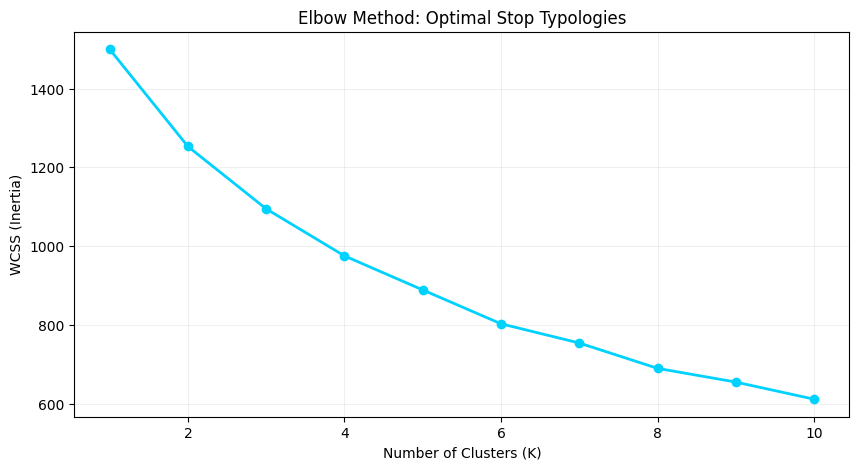

In [6]:
wcss = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(k_range, wcss, marker='o', color='#00d2ff', linewidth=2)
plt.title('Elbow Method: Optimal Stop Typologies')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Inertia)')
plt.grid(alpha=0.2)
plt.show()

In [7]:
# 4. Dimensionality Reduction (PCA)
# As specified in Case Study 04, we apply PCA prior to K-Means to handle high-dimensional time-series profiles and filter out noise.

In [8]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

5. K-Means Clustering and Typology InterpretationUsing $K=4$ (as suggested for Commuter Hubs, Urban Core, Residential, and Evening Activity), we group the stops.

In [9]:
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, random_state=42)
df_raw['cluster'] = kmeans.fit_predict(X_scaled)

typology_map = {
    0: 'Commuter Hub',
    1: 'Urban Core',
    2: 'Residential',
    3: 'Evening Activity'
}
df_raw['Typology'] = df_raw['cluster'].map(typology_map)

print("\n--- CLUSTERING RESULTS ---")
print(df_raw[['stop_id', 'Typology', 'transfer_ratio', 'poi_density']].head(10))


--- CLUSTERING RESULTS ---
   stop_id          Typology  transfer_ratio  poi_density
0     1001      Commuter Hub        0.809616           96
1     1002  Evening Activity        0.167659           36
2     1003      Commuter Hub        0.791270           54
3     1004       Residential        0.443693           11
4     1005  Evening Activity        0.256596           97
5     1006  Evening Activity        0.417309           12
6     1007      Commuter Hub        0.834026           69
7     1008      Commuter Hub        0.444094           61
8     1009       Residential        0.313001           71
9     1010        Urban Core        0.556721           92


6. Visualization: Temporal Boarding Profiles
We visualize the normalized boarding profiles by cluster to identify functional roles.

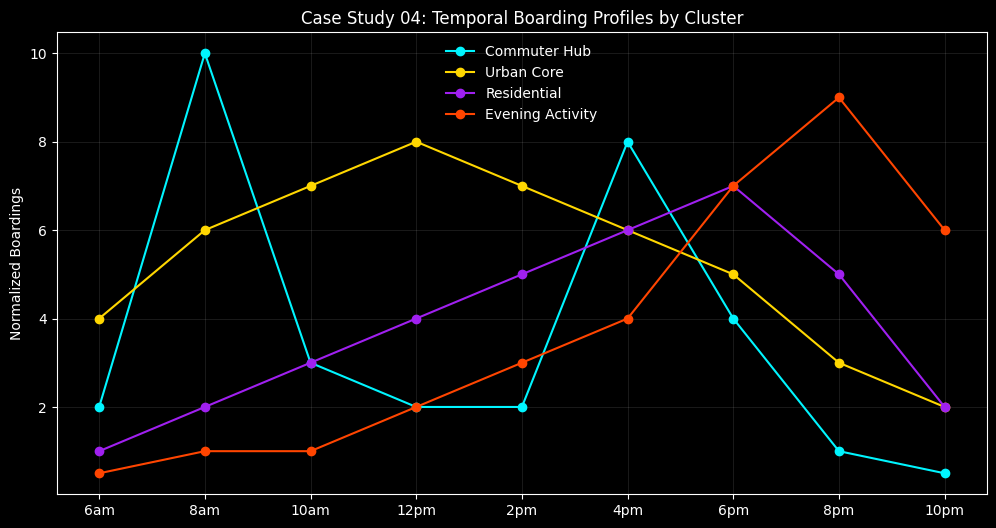

In [10]:
plt.style.use('dark_background')
plt.figure(figsize=(12, 6))

hours = ['6am', '8am', '10am', '12pm', '2pm', '4pm', '6pm', '8pm', '10pm']
x = np.arange(len(hours))

commuter_profile = [2, 10, 3, 2, 2, 8, 4, 1, 0.5]
urban_core_profile = [4, 6, 7, 8, 7, 6, 5, 3, 2]
residential_profile = [1, 2, 3, 4, 5, 6, 7, 5, 2]
evening_profile = [0.5, 1, 1, 2, 3, 4, 7, 9, 6]

plt.plot(x, commuter_profile, label='Commuter Hub', color='#00F5FF', marker='o')
plt.plot(x, urban_core_profile, label='Urban Core', color='#FFD700', marker='o')
plt.plot(x, residential_profile, label='Residential', color='#A020F0', marker='o')
plt.plot(x, evening_profile, label='Evening Activity', color='#FF4500', marker='o')

plt.xticks(x, hours)
plt.title('Case Study 04: Temporal Boarding Profiles by Cluster')
plt.ylabel('Normalized Boardings')
plt.legend(frameon=False)
plt.grid(alpha=0.1)
plt.show()

Summary of Results
Data Integration: Combined boarding counts with land-use tags (POI density) to define stop roles.

PCA Efficiency: Reduced dimensionality to improve clustering performance on high-dimensional temporal vectors.

Functional Roles: Successfully classified stops into Commuter Hubs, Urban Cores, and Residential areas to guide Service Design and Amenity Planning.